## Introduction:

Microsoft has decided to create a new movie studio, but they want to gather information to better understand the movie industry and what type of films to create.

Movies data were gathered to study, process, analyze, and make a decision to help Microsoft how they should start their movie studio.

The data that I have used are from The Movie Database (TMDb), Internet Movie Database (IMDb), The numbers (TN), and Box office Mojo (BOM).

The recommendation is going to be based on the best studio, Movie's production budget, which genre makes a lot of money, and the most popular genre.

In [1]:
import pandas as pd # importing the necessary libraries 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression # to add linear line
pd.options.display.max_rows=300
import matplotlib.ticker as ticker

In [2]:
df3 = pd.read_csv('zippedData/bom.movie_gross.csv.gz', compression='gzip') # data from Box office Mojo (BOM)
df3.head() # check what we have in the first row by using .head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
df3.shape #check how many rows and columns are there

(3387, 5)

In [4]:
df3.columns # check what we have in columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [5]:
df3.dtypes # checking the data type for each columns, if they are the correct type or not: 
#the foreign_ gross should be float but it is object so we should look into it.

title              object
studio             object
domestic_gross    float64
foreign_gross      object
year                int64
dtype: object

In [6]:
df3.duplicated().sum() #no duplicate

0

In [7]:
df3.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [8]:
28/3387 
#check the % of domestic_gross null to the data which is 0.8 %, I will fill them with 0 better than delete them

0.008266902863891349

In [9]:
df3["domestic_gross"] = df3["domestic_gross"].fillna(value = 0)

In [10]:
1350/3387 
#check the percentage of foreign_gross null which is 40 %, I can't drop 40% of the data, so I will fill them with 0

0.3985828166519043

In [11]:
df3["foreign_gross"] = df3["foreign_gross"].str.replace(',', '').astype(float) 
# change the type to float by deleting , and assign it to type float

In [12]:
df3["foreign_gross"] = df3["foreign_gross"].fillna(value = 0) 
#I have tried to fillna with median, mean and zero all of the gave the same mean so i filled it with 0
#to give better presentation of the given data

In [13]:
df3["studio"] = df3["studio"].fillna(value = "No Name") # fill the 5 null with "No Name" 
#dropping the 5 null "studio" gave me error later on, so i will fill them with "No Name"

In [14]:
df3.describe()# our data is skewed because the mean is larger than median(50th percentile) 
# the data is two years old because the last year in the data is 2018

,domestic_gross,foreign_gross,year
count,3.387000e+03,3.387000e+03,3387.000000
mean,2.850821e+07,4.502979e+07,2013.958075
std,6.675575e+07,1.126843e+08,2.478141
min,0.000000e+00,0.000000e+00,2010.000000
25%,1.115000e+05,0.000000e+00,2012.000000
50%,1.300000e+06,1.500000e+06,2014.000000
75%,2.750000e+07,2.915000e+07,2016.000000
max,9.367000e+08,9.605000e+08,2018.000000


In [15]:
df3["total_gross"]=df3["domestic_gross"]+df3["foreign_gross"]
#adding new column total gross which is the sum of domestic& foreign

In [16]:
df3.head() # check what we have now by using .head() after adding new column

,title,studio,domestic_gross,foreign_gross,year,total_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08


In [17]:
df3 = df3.drop(columns = "year") # dropping the year columns so it want aggregate when we use group by

In [18]:
top_ten = df3.groupby(["studio"]).agg("sum") #group by studio

In [19]:
top_ten = top_ten.sort_values("total_gross", ascending=False).head(10) # sort the value based on the total_gross
#ascending and taking only the top ten and assign it to top_ten dataframe
top_ten.reset_index(inplace=True) # reset the index
top_ten.head()

,studio,domestic_gross,foreign_gross,total_gross
0,BV,1.841903e+10,2.579385e+10,4.421288e+10
1,Fox,1.094950e+10,2.005587e+10,3.100537e+10
2,WB,1.216805e+10,1.866790e+10,3.083595e+10
3,Uni.,1.290239e+10,1.685477e+10,2.975716e+10
4,Sony,8.459683e+09,1.394535e+10,2.240504e+10


##  What are the top ten studios in the film industry?

Based on the data from Box Office Mojo, for 3,387 rows of data. I looked at the total gross which includes the domestic and foreign gross, so I can check which studio is doing the best in terms of revenue. so Microsoft can contract with to produce their movies. according to the bellow visualization, we have:

1. Walt Disney Studios (formerly Buena Vista)
2. 20th Century Fox
3. Warner Bros.
4. Universal Pictures
5. Sony Pictures Motion Picture Group
6. Paramount Pictures
7. New Line Cinema
8. Lionsgate Films
9. LG/S
10. DreamWorks Pictures

Based on the visualization, and since Walt Disney have their own streaming service: Disney plus. So it is recommended that Microsoft contract with one of the other top three studios; 20th Century Fox, Warner Bros., and Universal Pictures.

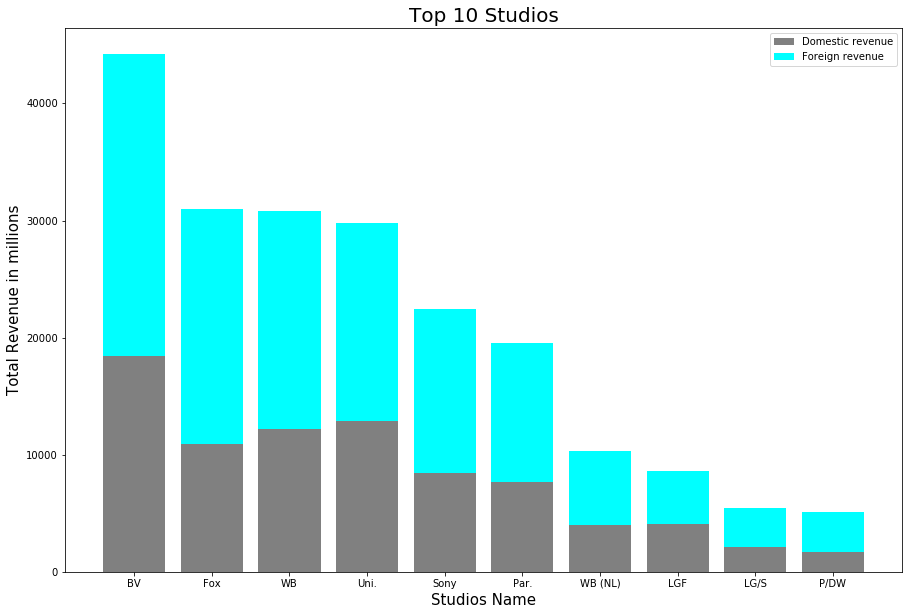

In [20]:
plt.figure(figsize =(15,10)) #using Matplotlib for graphing
plt.bar(top_ten["studio"], top_ten["domestic_gross"]/1000000, color='gray')
plt.bar(top_ten["studio"], top_ten["foreign_gross"]/1000000, color='cyan', bottom=top_ten["domestic_gross"]/1000000)
plt.xlabel('Studios Name', fontsize=15)
plt.ylabel('Total Revenue in millions', fontsize=15)
plt.xticks(top_ten["studio"])
plt.legend(['Domestic revenue', 'Foreign revenue'])
plt.title('Top 10 Studios', fontsize=20)
plt.xticks(np.arange(len(top_ten["studio"])), top_ten["studio"])
plt.show()

In [21]:
df00 = pd.read_csv('zippedData/tn.movie_budgets.csv.gz', compression='gzip')# data from The numbers (TN)
df00.head() # check what we have in the first row by using .head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [22]:
df00.shape #check how many rows and columns are there

(5782, 6)

In [23]:
df00.isnull().sum() # checking how many null value are there by using .isnull().sum()

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [24]:
df00.duplicated().sum() # check for duplicate

0

In [25]:
df00['movie'] = df00['movie'].str.lower()
# convert the data in the column (movie) to lowercase to be able to merge later

In [26]:
df00.dtypes # checking the data type for each columns, if they are the correct type or not 
# need to correct the data type of release_date, production_budget, domestic_gross and worldwide_gross

id                    int64
release_date         object
movie                object
production_budget    object
domestic_gross       object
worldwide_gross      object
dtype: object

In [27]:
df00 = df00.rename(columns = {"movie": "movie_title"}) #changing the name so we can merge based on movie_name

In [28]:
def currency(df, col): # defining function
    """
    Clean currency from dollar sign, commas, and convert it from string type to an integer type
    
    Parameters
    ----------
    df: pandas dataframe
     df containing column/s for currency
    col: string
      currency column with a dollar sign, commas
    
    Returns
    -------
    int
      clean currency form dollar sign and commas
     
    Example
    --------
    >>> currency(df, "production_budget")
   0       425000000
   1       410600000
   2       350000000
    """
    return df[col].str.replace('$', '').str.replace(',', '').astype(int)

In [29]:
df00["domestic_gross"] = currency(df00,"domestic_gross")
# convert the type of 'domestic_gross' to int by using the predefined function
df00.head()

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,"$425,000,000",760507625,"$2,776,345,279"
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,"$410,600,000",241063875,"$1,045,663,875"
2,3,"Jun 7, 2019",dark phoenix,"$350,000,000",42762350,"$149,762,350"
3,4,"May 1, 2015",avengers: age of ultron,"$330,600,000",459005868,"$1,403,013,963"
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,"$317,000,000",620181382,"$1,316,721,747"


In [30]:
df00["production_budget"] = currency(df00,"production_budget")
# convert the type of '"production_budget" to int by using the predefined function

In [31]:
df00["worldwide_gross"] = currency(df00,"worldwide_gross")
# convert the type of '"worldwide_gross" to int by using the predefined function

In [32]:
df00.head()

,id,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",avengers: age of ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [33]:
df00.drop("id", axis =1, inplace= True)
#dropping unwanted column (id)

In [34]:
df00['release_date'] =  pd.to_datetime(df00['release_date'])
df00.head()# convert release_date to date time object

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross
0,2009-12-18,avatar,425000000,760507625,2776345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,2019-06-07,dark phoenix,350000000,42762350,149762350
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747


In [35]:
df00.dtypes # now we have the correct type for all

release_date         datetime64[ns]
movie_title                  object
production_budget             int64
domestic_gross                int64
worldwide_gross               int64
dtype: object

In [36]:
#comparison_column = np.where(df00["worldwide_gross"] > df00["domestic_gross"], True, False)
#df00["bigger than"] = comparison_column
#print(df00)
#df00["bigger than"].head() # to double check that the domestic_gross is included in worldwide_gross

# to double check if my domestic_gross is included in worldwide_gross

In [37]:
df00["profit"] = df00["worldwide_gross"]-df00["production_budget"]# adding profit column

In [38]:
df00.head(1) #check our new columns

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,profit
0,2009-12-18,avatar,425000000,760507625,2776345279,2351345279


In [39]:
df00.describe()# our data is skewed because the mean is larger than median(50th percentile)

,production_budget,domestic_gross,worldwide_gross,profit
count,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,3.158776e+07,4.187333e+07,9.148746e+07,5.989970e+07
std,4.181208e+07,6.824060e+07,1.747200e+08,1.460889e+08
min,1.100000e+03,0.000000e+00,0.000000e+00,-2.002376e+08
25%,5.000000e+06,1.429534e+06,4.125415e+06,-2.189071e+06
50%,1.700000e+07,1.722594e+07,2.798445e+07,8.550286e+06
75%,4.000000e+07,5.234866e+07,9.764584e+07,6.096850e+07
max,4.250000e+08,9.366622e+08,2.776345e+09,2.351345e+09


## Is there any relationship between the movie’s production budget and  its revenue/ profit?

- Based on the data from the Numbers TN, for 5,782 rows of the dataset. Comparing the production budget versus revenue. As you can see in the scatter plot that there is little room between the data points and the regression line, that means there is a strong positive correlation between the production budget and the worldwide gross, as we spend more money on the production, we get more in the revenue.
- Also, in the second scatter plot there is a positive correlation between the production budget and the profit. That's mean the more that Microsoft will spend on their movie production budget, the more they will get in return and profit. So a higher production budget gets higher revenue and profit.

Text(0.5, 1.0, 'The Production Budget vs Worldwide Gross')

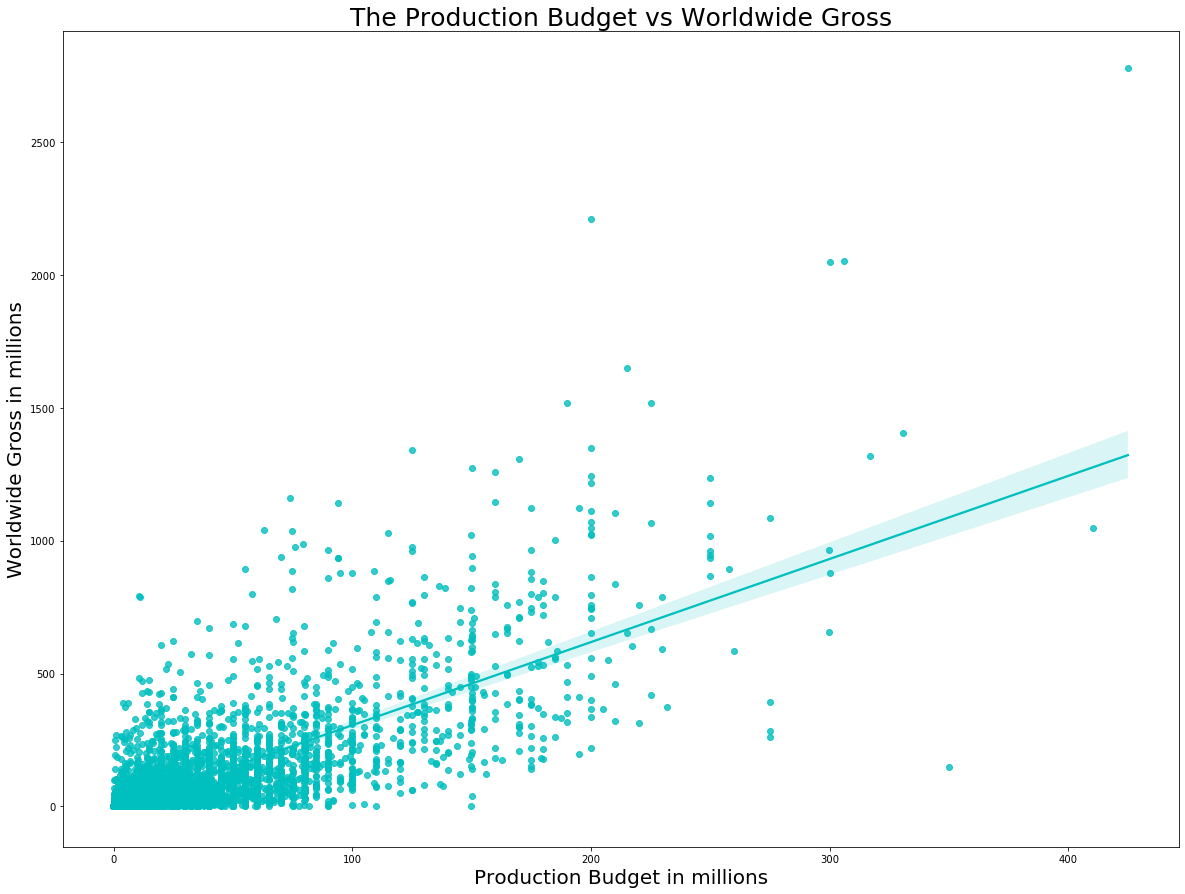

In [40]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(data=df00, x=df00["production_budget"]/1000000, y=df00["worldwide_gross"]/1000000, 
            color= "c",ax=ax,x_jitter=0.05) 
plt.xlabel('Production Budget in millions',fontsize=20)
plt.ylabel('Worldwide Gross in millions',fontsize=20)
plt.title("The Production Budget vs Worldwide Gross", fontsize=25)

Text(0.5, 1.0, 'The Production Budget vs The Profit')

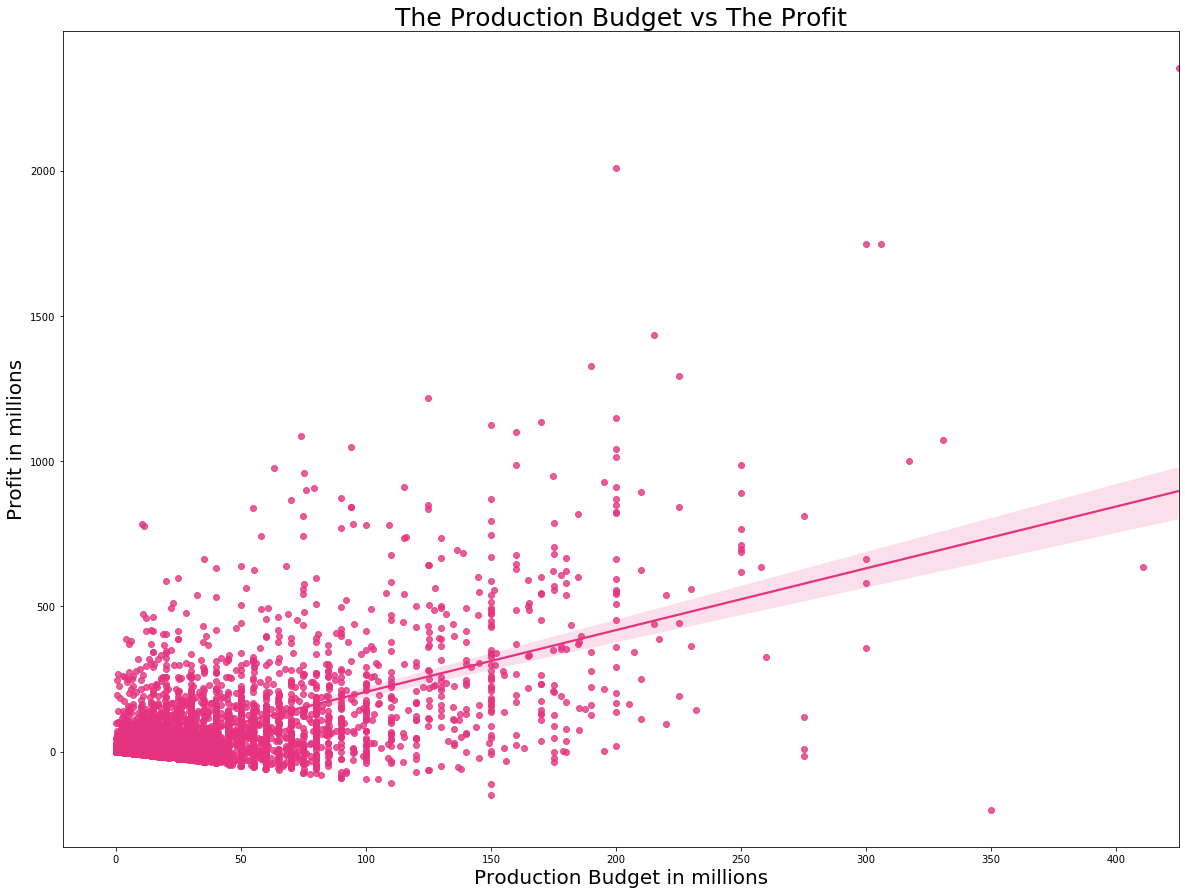

In [41]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.regplot(data=df00, x=df00["production_budget"]/1000000, y=df00["profit"]/1000000,
            color= (0.9, 0.2, 0.5, 0.2),ax=ax,x_jitter=0.05)
plt.xlabel('Production Budget in millions',fontsize=20)
plt.ylabel('Profit in millions',fontsize=20)
plt.title("The Production Budget vs The Profit", fontsize=25)


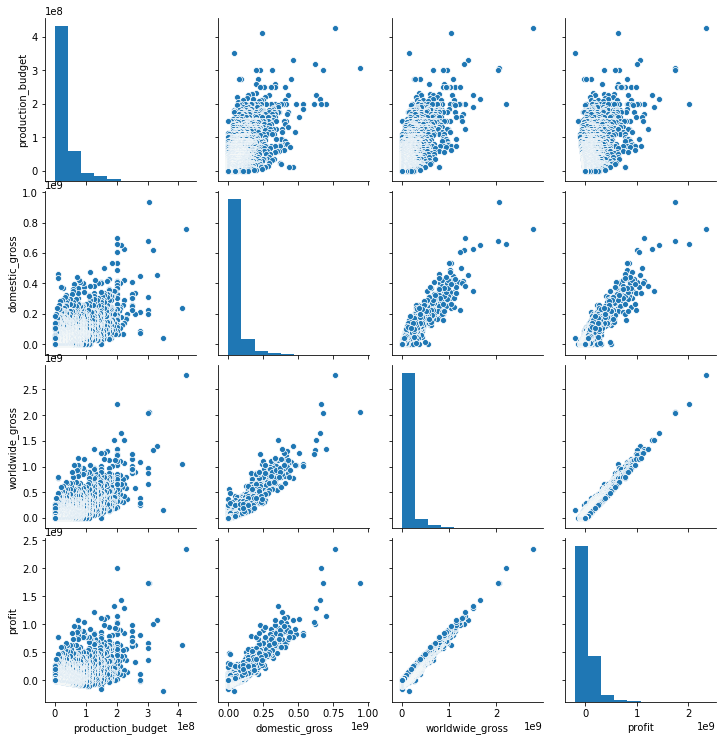

In [42]:
sns.pairplot(df00)

In [43]:
df0 = pd.read_csv('zippedData/tmdb.movies.csv.gz', compression='gzip') #The Movie Database (TMDb)
df0.head()  # check what we have in the first row by using .head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [44]:
df0.shape #check how many rows and columns are there

(26517, 10)

In [45]:
df0[['id']].duplicated().sum() # check if we have duplicate movie base on thier id

1020

In [46]:
df0["id"].drop_duplicates(inplace=True) 
#duplicated movie id means duplicated movie so I'll drop them

In [47]:
df0["id"].duplicated().any() #sanity check

False

In [48]:
df0.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

Unnamed: 0           0
genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [49]:
df0.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [50]:
df0.drop(['Unnamed: 0','genre_ids','id','original_language','original_title'],axis =1,inplace= True)
#dropping unwanted columns

In [51]:
df0.tail()# check the new df

,popularity,release_date,title,vote_average,vote_count
26512,0.6,2018-10-13,Laboratory Conditions,0.0,1
26513,0.6,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,0.6,2018-10-01,The Last One,0.0,1
26515,0.6,2018-06-22,Trailer Made,0.0,1
26516,0.6,2018-10-05,The Church,0.0,1


In [52]:
df0.drop(['vote_average','vote_count'],axis =1,inplace= True)#dropping unwanted columns

In [53]:
df0['title'] = df0['title'].str.lower()
#convert the data in the columns (title) to lower case to be able to merge based on the title with another dataframe

In [54]:
df0.dtypes # checking the data type for each columns, if they are the correct type or not 

popularity      float64
release_date     object
title            object
dtype: object

In [55]:
df0['release_date'] =  pd.to_datetime(df0['release_date']) # correct the date type

In [56]:
df0.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

popularity      0
release_date    0
title           0
dtype: int64

In [57]:
df0.head()

,popularity,release_date,title
0,33.533,2010-11-19,harry potter and the deathly hallows: part 1
1,28.734,2010-03-26,how to train your dragon
2,28.515,2010-05-07,iron man 2
3,28.005,1995-11-22,toy story
4,27.920,2010-07-16,inception


In [58]:
df0 = df0.rename(columns = {"title": "movie_title"}) #changing the name so we can merge based on name

In [59]:
df0.head()

,popularity,release_date,movie_title
0,33.533,2010-11-19,harry potter and the deathly hallows: part 1
1,28.734,2010-03-26,how to train your dragon
2,28.515,2010-05-07,iron man 2
3,28.005,1995-11-22,toy story
4,27.920,2010-07-16,inception


In [60]:
df0['year'] = pd.DatetimeIndex(df0['release_date']).year 
#extract the year from release_date and assign it to new column to use later in merge because some movies have
# same name but diffrent years, so basicly they are not the same movie

In [61]:
df1 = pd.read_csv('zippedData/imdb.title.basics.csv.gz', compression='gzip') #IMDb data
df1.head() # check what we have in the first row by using .head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [62]:
df1.shape #check how many rows and columns are there

(146144, 6)

In [63]:
df1.columns 
#tconst (string) - alphanumeric unique identifier of the title from: https://www.imdb.com/interfaces/

Index(['tconst', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres'],
      dtype='object')

In [64]:
df1.dtypes # checking the data type for each columns, if they are the correct type or not 

tconst              object
primary_title       object
original_title      object
start_year           int64
runtime_minutes    float64
genres              object
dtype: object

In [65]:
df1.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

tconst                 0
primary_title          0
original_title        21
start_year             0
runtime_minutes    31739
genres              5408
dtype: int64

In [66]:
31739/146144  # I can't drop 22%  runtime_minutes' data so I will change it to 0 

0.21717620976571053

In [67]:
df1["original_title"] = df1["original_title"].fillna(value = "No Name") # fill the 21 null with "No Name"

In [68]:
df1["genres"] = df1["genres"].fillna(value = "Unknown")# fill the 5408 null with "Unknown"

In [69]:
df1["runtime_minutes"] = df1["runtime_minutes"].fillna(value = 0) # fill 31739 null in runtime_minute with zero

In [70]:
df1.isnull().sum() # recheck the null

tconst             0
primary_title      0
original_title     0
start_year         0
runtime_minutes    0
genres             0
dtype: int64

In [71]:
df1.nunique()

tconst             146144
primary_title      136071
original_title     137774
start_year             19
runtime_minutes       368
genres               1086
dtype: int64

In [72]:
df1.duplicated("tconst", keep= "last").any() 
# checking for duplicates in the tconst since it is fasle we don't have duplicate movie

False

In [73]:
df1['primary_title'] = df1['primary_title'].str.lower()
# convert the data in the columns (primary_title) to lower case to be able to merge based on the title with 
#another df

In [74]:
df1.drop(['original_title'], axis =1, inplace= True)
#dropping unwanted columns "original_title"

In [75]:
df1 = df1.rename(columns = {"primary_title": "movie_title"}) #changing the name so we can merge based on name

In [76]:
df1.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,2018,122.0,Drama
3,tt0069204,sabse bada sukh,2018,0.0,"Comedy,Drama"
4,tt0100275,the wandering soap opera,2017,80.0,"Comedy,Drama,Fantasy"


In [77]:
df1.describe() 
# you can see that the max start_year is 2115??? we don't need years after the current year (2020)
#because we don't have enough information about them
# the data minimum year is 2010 

,start_year,runtime_minutes
count,146144.000000,146144.000000
mean,2014.621798,67.469427
std,2.733583,151.420470
min,2010.000000,0.000000
25%,2012.000000,34.000000
50%,2015.000000,79.000000
75%,2017.000000,95.000000
max,2115.000000,51420.000000


In [78]:
df1[df1["start_year"]== 2115] 
# check what is in 2115
# 100 years,content of this film is currently a secret,due to be revealed only when the title is released in 2115.
#https://www.imdb.com/title/tt5174640/ 

,tconst,movie_title,start_year,runtime_minutes,genres
89506,tt5174640,100 years,2115,0.0,Drama


In [79]:
df1["start_year"].unique() # check what other unique years we have

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027])

In [80]:
df1.drop(df1[df1["start_year"]>2020].index, inplace= True)
# deleting years after 2020 because we don't have enough information about them

In [81]:
df1.head()

,tconst,movie_title,start_year,runtime_minutes,genres
0,tt0063540,sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,one day before the rainy season,2019,114.0,"Biography,Drama"
2,tt0069049,the other side of the wind,2018,122.0,Drama
3,tt0069204,sabse bada sukh,2018,0.0,"Comedy,Drama"
4,tt0100275,the wandering soap opera,2017,80.0,"Comedy,Drama,Fantasy"


In [82]:
df1.describe() # sanity check

,start_year,runtime_minutes
count,146018.000000,146018.000000
mean,2014.615219,67.522607
std,2.714505,151.473279
min,2010.000000,0.000000
25%,2012.000000,35.000000
50%,2015.000000,79.000000
75%,2017.000000,95.000000
max,2020.000000,51420.000000


In [83]:
df2 = pd.read_csv('zippedData/imdb.title.ratings.csv.gz', compression='gzip') #IMDb rating
df2.head() # check what we have in the first row by using .head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [84]:
df2.shape #check how many rows and columns are there

(73856, 3)

In [85]:
df1.shape

(146018, 5)

In [86]:
df2.columns 
# tconst (string) - alphanumeric unique identifier of the title from: https://www.imdb.com/interfaces/

Index(['tconst', 'averagerating', 'numvotes'], dtype='object')

In [87]:
df2.dtypes # checking the data type for each columns, if they are the correct type or not

tconst            object
averagerating    float64
numvotes           int64
dtype: object

In [88]:
df2.isnull().sum() # checking how many null value are there by usinf .isnull().sum()

tconst           0
averagerating    0
numvotes         0
dtype: int64

In [89]:
df2.duplicated().any() # check if I have any duplicae in the df2

False

In [90]:
df= pd.merge(df1,df2, on="tconst") # merging the df1,df2 on the common column "tconst" and assign it to df

In [91]:
df.shape

(73856, 7)

In [92]:
df.head() #check what we have in the new df

,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,one day before the rainy season,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,the other side of the wind,2018,122.0,Drama,6.9,4517
3,tt0069204,sabse bada sukh,2018,0.0,"Comedy,Drama",6.1,13
4,tt0100275,the wandering soap opera,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [93]:
df.duplicated().any() # check if I have any duplicae in the df

False

In [94]:
df.isnull().any() # check if I have any null

tconst             False
movie_title        False
start_year         False
runtime_minutes    False
genres             False
averagerating      False
numvotes           False
dtype: bool

In [95]:
df.describe() #the data is skewed to the left because the mean is less than the median

,start_year,runtime_minutes,averagerating,numvotes
count,73856.000000,73856.000000,73856.000000,7.385600e+04
mean,2014.276132,84.888228,6.332729,3.523662e+03
std,2.614807,199.608940,1.474978,3.029402e+04
min,2010.000000,0.000000,1.000000,5.000000e+00
25%,2012.000000,75.000000,5.500000,1.400000e+01
50%,2014.000000,90.000000,6.500000,4.900000e+01
75%,2016.000000,101.000000,7.400000,2.820000e+02
max,2019.000000,51420.000000,10.000000,1.841066e+06


In [96]:
df.isna().any() # check for null

tconst             False
movie_title        False
start_year         False
runtime_minutes    False
genres             False
averagerating      False
numvotes           False
dtype: bool

In [97]:
df.duplicated().sum() # check if we have duplicate

0

In [98]:
len(df0)

26517

In [99]:
year_movie = pd.merge(df,df0, how="inner", left_on=["movie_title", "start_year"], right_on=["movie_title", "year"])
year_movie.head() 
#merging the df(both IMDb) and (TMDb) based on movie name and year to creat new df called year_movie 

,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes,popularity,release_date,year
0,tt0069049,the other side of the wind,2018,122.0,Drama,6.9,4517,9.800,2018-11-02,2018
1,tt0192528,heaven & hell,2018,104.0,Drama,4.0,72,0.600,2018-11-06,2018
2,tt0255820,return to babylon,2013,75.0,"Biography,Comedy,Drama",5.9,123,0.877,2013-08-11,2013
3,tt0315642,wazir,2016,103.0,"Action,Crime,Drama",7.1,15378,3.881,2016-01-08,2016
4,tt0326965,in my sleep,2010,104.0,"Drama,Mystery,Thriller",5.5,1889,1.795,2010-04-23,2010


In [100]:
year_movie.describe() # the data include the years from 2010 to 2018

,start_year,runtime_minutes,averagerating,numvotes,popularity,year
count,12984.000000,12984.000000,12984.000000,1.298400e+04,12984.000000,12984.000000
mean,2014.217807,93.063540,5.830168,1.858841e+04,4.085864,2014.217807
std,2.468472,22.921952,1.424110,7.214409e+04,5.353651,2.468472
min,2010.000000,0.000000,1.100000,5.000000e+00,0.600000,2010.000000
25%,2012.000000,84.000000,4.900000,1.180000e+02,0.685000,2012.000000
50%,2014.000000,92.000000,6.000000,4.920000e+02,1.830500,2014.000000
75%,2016.000000,102.000000,6.900000,3.483500e+03,5.934000,2016.000000
max,2018.000000,724.000000,9.800000,1.841066e+06,80.773000,2018.000000


In [101]:
year_movie.drop(["start_year","year"],axis =1,inplace= True)
#dropping unwanted columns

In [102]:
year_movie = year_movie.rename(columns = {"tconst": "movie_id"}) 
#changing the tconst to more understandable name "movie_id"

In [103]:
year_movie.head()

,movie_id,movie_title,runtime_minutes,genres,averagerating,numvotes,popularity,release_date
0,tt0069049,the other side of the wind,122.0,Drama,6.9,4517,9.800,2018-11-02
1,tt0192528,heaven & hell,104.0,Drama,4.0,72,0.600,2018-11-06
2,tt0255820,return to babylon,75.0,"Biography,Comedy,Drama",5.9,123,0.877,2013-08-11
3,tt0315642,wazir,103.0,"Action,Crime,Drama",7.1,15378,3.881,2016-01-08
4,tt0326965,in my sleep,104.0,"Drama,Mystery,Thriller",5.5,1889,1.795,2010-04-23


In [104]:
year_movie.shape

(12984, 8)

In [105]:
year_movie["movie_id"].drop_duplicates(keep='first', inplace=True)
year_movie["movie_id"].duplicated().any() 
#check if we have any duplicate in the movie id

False

In [106]:
new_columns = ["movie_id","movie_title","release_date","averagerating","numvotes","popularity","runtime_minutes","genres"]
# creatin a new list with columns names to rearrage the order of columns name

In [107]:
year_movie = year_movie[new_columns] # rearranging the columns and assign it to our df

In [108]:
year_movie.head()

,movie_id,movie_title,release_date,averagerating,numvotes,popularity,runtime_minutes,genres
0,tt0069049,the other side of the wind,2018-11-02,6.9,4517,9.800,122.0,Drama
1,tt0192528,heaven & hell,2018-11-06,4.0,72,0.600,104.0,Drama
2,tt0255820,return to babylon,2013-08-11,5.9,123,0.877,75.0,"Biography,Comedy,Drama"
3,tt0315642,wazir,2016-01-08,7.1,15378,3.881,103.0,"Action,Crime,Drama"
4,tt0326965,in my sleep,2010-04-23,5.5,1889,1.795,104.0,"Drama,Mystery,Thriller"


In [109]:
year_movie["genres"] = year_movie["genres"].str.split(',') #spliting the genres by ,

In [110]:
genre = year_movie.explode("genres") 
# .explode Transform each element of a list-like to a row and put assign it to new df called genre

In [111]:
genre.head()# if the movie has 3 genres, the movie will be replicated 3 times

,movie_id,movie_title,release_date,averagerating,numvotes,popularity,runtime_minutes,genres
0,tt0069049,the other side of the wind,2018-11-02,6.9,4517,9.800,122.0,Drama
1,tt0192528,heaven & hell,2018-11-06,4.0,72,0.600,104.0,Drama
2,tt0255820,return to babylon,2013-08-11,5.9,123,0.877,75.0,Biography
2,tt0255820,return to babylon,2013-08-11,5.9,123,0.877,75.0,Comedy
2,tt0255820,return to babylon,2013-08-11,5.9,123,0.877,75.0,Drama


In [112]:
df00.head()

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,profit
0,2009-12-18,avatar,425000000,760507625,2776345279,2351345279
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,635063875
2,2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747,999721747


In [113]:
df00['year'] = pd.DatetimeIndex(df00['release_date']).year 
#extract the year from release_date and assign it to new column to use later in merge because some movies have
# same name but diffrent years, so basicly they are not the same movie

In [114]:
df00.head() #sanity check

,release_date,movie_title,production_budget,domestic_gross,worldwide_gross,profit,year
0,2009-12-18,avatar,425000000,760507625,2776345279,2351345279,2009
1,2011-05-20,pirates of the caribbean: on stranger tides,410600000,241063875,1045663875,635063875,2011
2,2019-06-07,dark phoenix,350000000,42762350,149762350,-200237650,2019
3,2015-05-01,avengers: age of ultron,330600000,459005868,1403013963,1072413963,2015
4,2017-12-15,star wars ep. viii: the last jedi,317000000,620181382,1316721747,999721747,2017


In [115]:
success_genre = pd.merge(df,df00, how="inner",left_on=["movie_title","start_year"],right_on=["movie_title","year"])
success_genre.head() 
#merging the df(both IMDb) and The numbers (TN) based on movie name and year to creat new df called year_movie 

,tconst,movie_title,start_year,runtime_minutes,genres,averagerating,numvotes,release_date,production_budget,domestic_gross,worldwide_gross,profit,year
0,tt0249516,foodfight!,2012,91.0,"Action,Animation,Comedy",1.9,8248,2012-12-31,45000000,0,73706,-44926294,2012
1,tt0359950,the secret life of walter mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,2013-12-25,91000000,58236838,187861183,96861183,2013
2,tt0365907,a walk among the tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,2014-09-19,28000000,26017685,62108587,34108587,2014
3,tt0369610,jurassic world,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,2015-06-12,215000000,652270625,1648854864,1433854864,2015
4,tt0376136,the rum diary,2011,119.0,"Comedy,Drama",6.2,94787,2011-10-28,45000000,13109815,21544732,-23455268,2011


In [116]:
success_genre.drop(['start_year','averagerating','numvotes','release_date'],axis =1,inplace= True)
#dropping unwanted columns

In [117]:
success_genre.head()

,tconst,movie_title,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,profit,year
0,tt0249516,foodfight!,91.0,"Action,Animation,Comedy",45000000,0,73706,-44926294,2012
1,tt0359950,the secret life of walter mitty,114.0,"Adventure,Comedy,Drama",91000000,58236838,187861183,96861183,2013
2,tt0365907,a walk among the tombstones,114.0,"Action,Crime,Drama",28000000,26017685,62108587,34108587,2014
3,tt0369610,jurassic world,124.0,"Action,Adventure,Sci-Fi",215000000,652270625,1648854864,1433854864,2015
4,tt0376136,the rum diary,119.0,"Comedy,Drama",45000000,13109815,21544732,-23455268,2011


In [118]:
success_genre["tconst"].duplicated().sum() #check if we have duplicate movie

0

In [119]:
success_genre["genres"] = success_genre["genres"].str.split(',') #spliting the genres by ,

In [120]:
genre_gross = success_genre.explode("genres") 
# .explode Transform each element of a list-like to a row and put assign it to new df called genre

In [121]:
genre_gross.head()

,tconst,movie_title,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,profit,year
0,tt0249516,foodfight!,91.0,Action,45000000,0,73706,-44926294,2012
0,tt0249516,foodfight!,91.0,Animation,45000000,0,73706,-44926294,2012
0,tt0249516,foodfight!,91.0,Comedy,45000000,0,73706,-44926294,2012
1,tt0359950,the secret life of walter mitty,114.0,Adventure,91000000,58236838,187861183,96861183,2013
1,tt0359950,the secret life of walter mitty,114.0,Comedy,91000000,58236838,187861183,96861183,2013


In [122]:
most_sucess_genre = genre_gross.groupby(["genres"]).agg("sum") # creat new df and group it by genre

In [123]:
most_sucess_genre.drop(['runtime_minutes','year'],axis =1,inplace= True)
#dropping unwanted columns

In [124]:
most_sucess_genre = most_sucess_genre.sort_values("profit", ascending=False).head(10) 
most_sucess_genre.reset_index(inplace=True) # reset out index
# sort the value based on the total_gross
#ascending and taking only the top ten and assign it to most_sucess_genre dataframe

In [125]:
most_sucess_genre.head(10)

,genres,production_budget,domestic_gross,worldwide_gross,profit
0,Adventure,37868690000,44131427363,124418626769,86549936769
1,Action,35962530000,39369573754,108288791266,72326261266
2,Comedy,21520355000,31058672219,70576552865,49056197865
3,Drama,19555188950,24526567514,53724432123,34169243173
4,Sci-Fi,12654900000,16841974646,46161508510,33506608510
5,Animation,10169500000,14182509129,38938423745,28768923745
6,Thriller,8635854950,11623974070,30143375138,21507520188
7,Fantasy,10843750000,10563227529,30496041674,19652291674
8,Family,6281250000,7443174281,18271262367,11990012367
9,Crime,7682550000,8613924725,19128386642,11445836642


## Which genre of movies is the most profitable?

Based on the data from the Internet Movie Database (IMDb), and the data from the numbers (TN) from 2010 to 2019. After comparing the genres and the profit of the movie we can see that the top five popular genres are:

       1. Adventure
       2. Action
       3. Comedy
       4. Drama
       5. Sci-Fi

Based on the visualization, we can recommend to Microsoft what genre of movie is profitable to start their movie with; on the top of the list is Adventure which is followed by Action, and Comedy.

Text(0.5, 1.0, 'The Most Successful Genre')

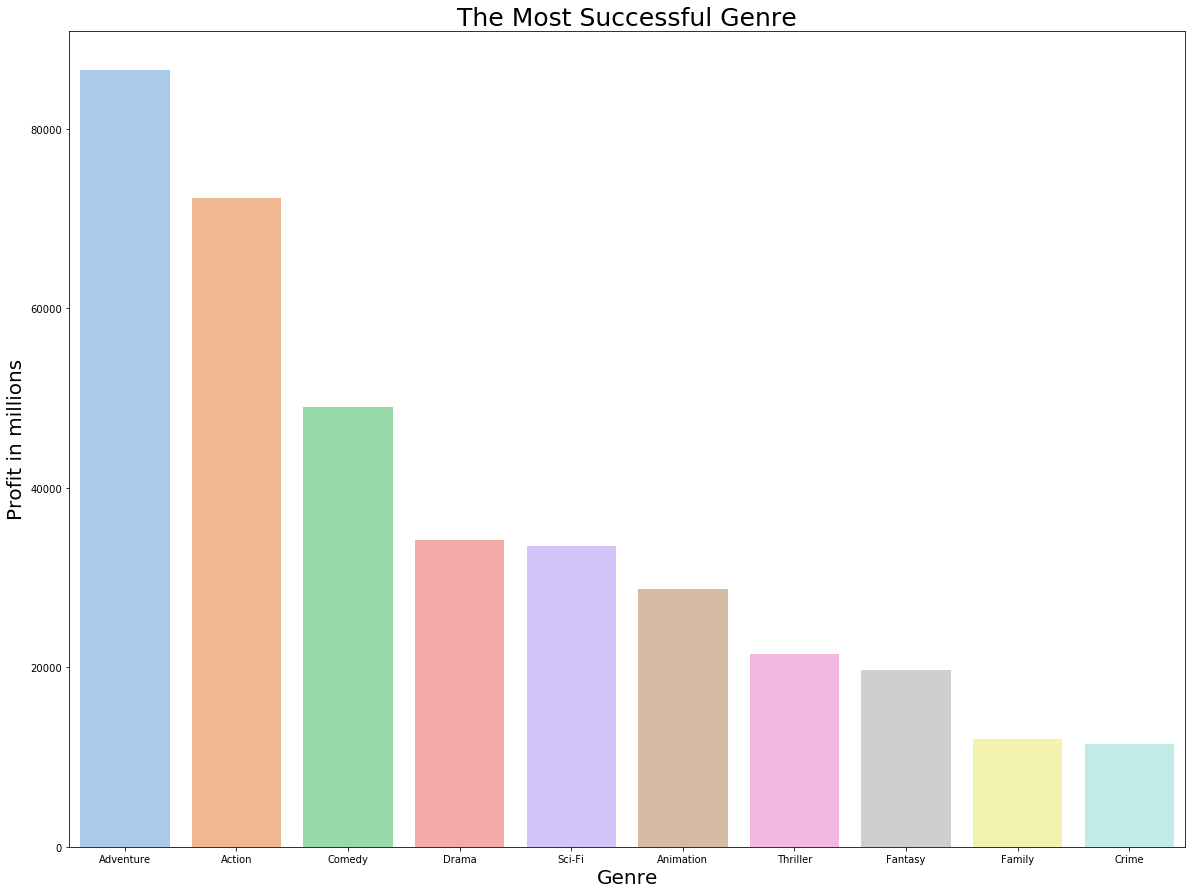

In [126]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "genres", y = most_sucess_genre["profit"]/1000000, ax=ax, data=most_sucess_genre, palette="pastel")
plt.xlabel('Genre',fontsize=20)
plt.ylabel('Profit in millions',fontsize=20)
plt.title("The Most Successful Genre", fontsize=25)


In [127]:
popular_genres = genre.groupby(["genres"]).agg("sum") # creat new df and group it by genre

In [128]:
popular_genres = popular_genres.sort_values("popularity", ascending=False).head(10) # sort the value based on the total_gross
#ascending and taking only the top ten and assign it to popular_genres dataframe

In [129]:
popular_genres.head(10)

,averagerating,numvotes,popularity,runtime_minutes
genres,,,,
Drama,32257.4,110113977,24251.812,527719.0
Comedy,18100.2,65117369,14968.526,296870.0
Action,9521.5,97340666,13591.133,177407.0
Thriller,11526.6,44124883,10274.261,212203.0
Adventure,6162.7,86359690,9920.191,104934.0
Horror,10667.4,19911117,8186.256,204086.0
Crime,7078.6,37981502,7457.987,121333.0
Romance,7456.4,23696784,5889.511,123406.0
Sci-Fi,3703.7,43085634,4772.065,69504.0


In [130]:
popular_genres.reset_index(inplace=True) # reset out index
popular_genres

,genres,averagerating,numvotes,popularity,runtime_minutes
0,Drama,32257.4,110113977,24251.812,527719.0
1,Comedy,18100.2,65117369,14968.526,296870.0
2,Action,9521.5,97340666,13591.133,177407.0
3,Thriller,11526.6,44124883,10274.261,212203.0
4,Adventure,6162.7,86359690,9920.191,104934.0
5,Horror,10667.4,19911117,8186.256,204086.0
6,Crime,7078.6,37981502,7457.987,121333.0
7,Romance,7456.4,23696784,5889.511,123406.0
8,Sci-Fi,3703.7,43085634,4772.065,69504.0
9,Mystery,4393.0,22830231,4275.749,76345.0


## Which genre of the movie is the most popular?

Based on the data from the Internet Movie Database (IMDb) and The Movie Database (TMDb) from 2010 till 2018 for 12984 rows. After comparing the genres and popularity, we can see that the top five popular genres are:

1.	Drama
2.	Comedy
3.	Action
4.	Thriller
5.	Horror

So based on the visualization, it is recommended that Microsoft originate their movies with the most popular genre like Drama.
A good movie for their studio would be a movie about Bill Gates.

Text(0.5, 1.0, 'The Most Popular Genre')

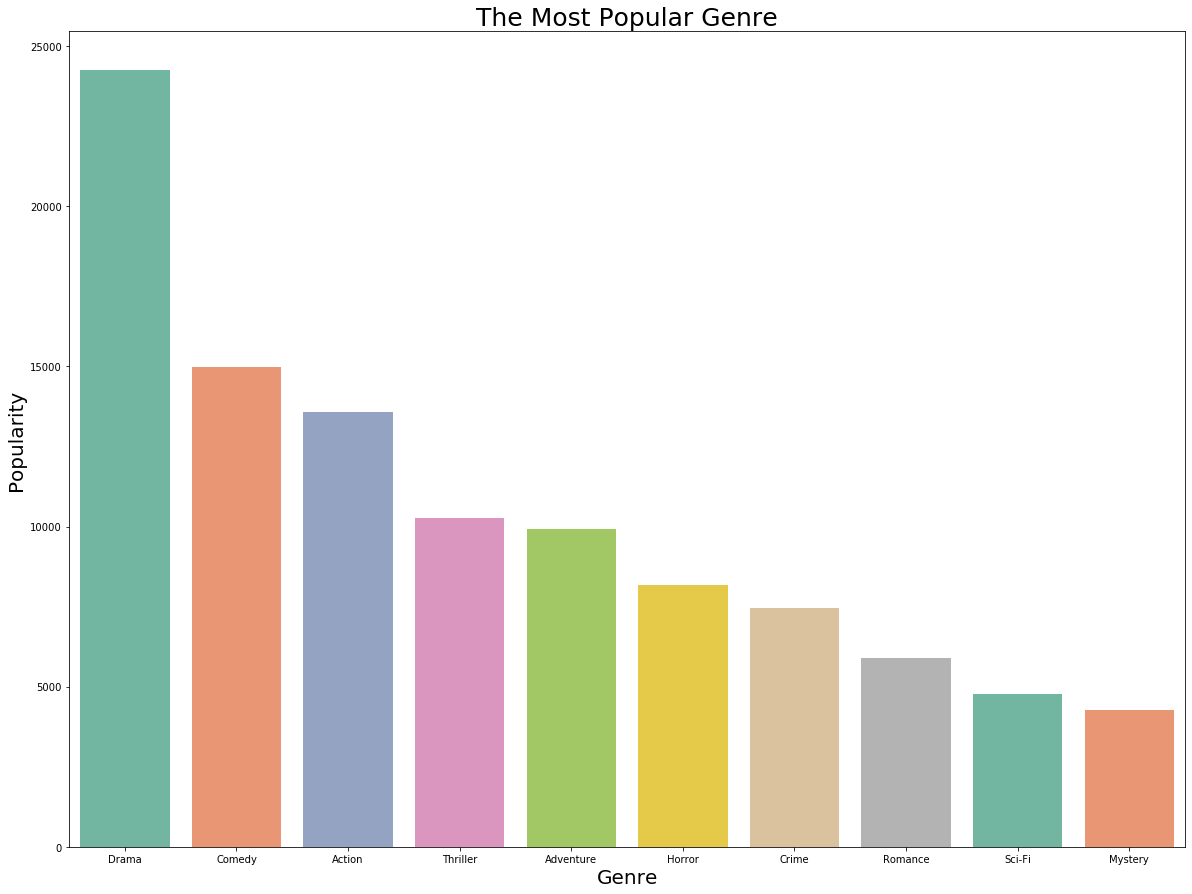

In [131]:
fig_dims = (20, 15)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "genres", y = "popularity", ax=ax, data=popular_genres, palette="Set2")
plt.xlabel('Genre',fontsize=20)
plt.ylabel('Popularity',fontsize=20)
plt.title("The Most Popular Genre", fontsize=25)


## Recomemendations

1. Best Studios to contract with:20th Century Fox, Warner Bros. and Universal Pictures are top three studio to partner with.
2. More in movie production budget, more in revenue. 
3. A higher production budget gets higher profit.
4. Profitable Genre: Adventure, Action, and Comedy.
5. Popular Genre: Drama, Comedy, and Action.

## Limitation:

- I noticed that the data from Box office Mojo (BOM) is not up to date, which limits me to make another comparison between the domestic and the foreign gross.
- The small size of the datasets provided

## Observations:

- I found out while I was on the TMDb website that there was a perfect way to merge the data with IMDb using tconst because each movie's link has a tconst inside the link. example: https://www.themoviedb.org/redirect?external_source=imdb_id&external_id=tt2975590 

- I also found out that on the TMDb website that each genre is associated with Id number, so it was easier to get the name of the genres from a dictionary than merging with another data frame to minimize the error  https://www.themoviedb.org/talk/5daf6eb0ae36680011d7e6ee


{
Action          28,
Adventure       12,
Animation       16,
Comedy          35,
Crime           80,
Documentary     99,
Drama           18,
Family          10751,
Fantasy         14,
History         36,
Horror          27,
Music           10402,
Mystery         9648,
Romance         10749,
Science Fiction 878,
TV Movie        10770,
Thriller        53,
War             10752,
Western         37}

## Future work:

- I noticed that the data from Box office Mojo (BOM) is not up to date, which limits me to make another comparison between the domestic and the foreign gross. so I would like to use APIs to get more accurate data.
- Use APIs to get other movie datasets like Rotten Tomatoes